### Importing Modules

In [1]:
import seaborn as sns
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt


### Importing the dataset

In [2]:
df_test = pd.read_csv('data/laptops_test.csv', sep = ',') # test data
df = pd.read_csv('data/laptops_train.csv', sep = ',') # train data

In [3]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              325 non-null    object 
 1   Model Name                325 non-null    object 
 2   Category                  325 non-null    object 
 3   Screen Size               325 non-null    object 
 4   Screen                    325 non-null    object 
 5   CPU                       325 non-null    object 
 6   RAM                       325 non-null    object 
 7    Storage                  325 non-null    object 
 8   GPU                       325 non-null    object 
 9   Operating System          325 non-null    object 
 10  Operating System Version  291 non-null    object 
 11  Weight                    325 non-null    object 
 12  Price                     325 non-null    float64
dtypes: float64(1), object(12)
memory usage: 33.1+ KB


In [6]:
# To know the distinct occurence
dict = {}

for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index = ['unique_count']).transpose()

,unique_count
Manufacturer,19
Model Name,488
Category,6
Screen Size,18
Screen,38
CPU,106
RAM,8
Storage,36
GPU,98
Operating System,7


In [7]:
df.duplicated().sum()
# 0 coming so no rows identically same

0

In [8]:
# Removing GB
df["RAM"] = df["RAM"].str.replace("GB", "")
df_test["RAM"] = df["RAM"].str.replace("GB","")
df["RAM"]= df["RAM"].astype("int32")
df_test["RAM"]= df_test["RAM"].astype("int32")

In [9]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [10]:
(df.isnull().sum()/len(df))
# OS version not returning 0 so need to fill some rows

Manufacturer                0.000000
Model Name                  0.000000
Category                    0.000000
Screen Size                 0.000000
Screen                      0.000000
CPU                         0.000000
RAM                         0.000000
 Storage                    0.000000
GPU                         0.000000
Operating System            0.000000
Operating System Version    0.139202
Weight                      0.000000
Price                       0.000000
dtype: float64

In [11]:
# Filling vacant rows for our models to work properly

df['Operating System Version']=df['Operating System Version'].fillna(df['Operating System Version'].mode()[0])
df_test['Operating System Version']=df_test['Operating System Version'].fillna(df_test['Operating System Version'].mode()[0])

In [12]:
df.describe()

,RAM,Price
count,977.000000,9.770000e+02
mean,8.528147,1.001899e+07
std,4.997487,6.306430e+06
min,2.000000,1.706375e+06
25%,4.000000,5.326308e+06
50%,8.000000,8.527428e+06
75%,8.000000,1.311570e+07
max,32.000000,5.423231e+07


In [13]:
df.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                  object
Screen                       object
CPU                          object
RAM                           int32
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                       object
Price                       float64
dtype: object

In [14]:
# removing kgs from weight and then making weights into data type
# making the price into numeric data type

df['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['Weight'].replace(to_replace='s', value='', regex=True, inplace=True)

df['Weight'] = df['Weight'].astype("float64")
df_test['Weight'] = df_test['Weight'].astype("float64")

In [15]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20


In [16]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0


In [17]:
df["Screen Size"] = df["Screen Size"].str.replace("\"","")
# df_test["Screen Size"] = df_test["Screen Size"].str.replace('"',"")
df['Screen Size'] = df['Screen Size'].astype("float64")
# df_test['Screen Size'] = df_test['Screen Size'].astype("float64")

In [18]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0


In [19]:
df_test["Screen Size"] = df_test["Screen Size"].str.replace('"',"")
df_test['Screen Size'] = df_test['Screen Size'].astype("float64")

In [20]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0


In [21]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    float64
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    int32  
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  977 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
dtypes: float64(3), int32(1), object(9)
memory usage: 95.5+ KB


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              325 non-null    object 
 1   Model Name                325 non-null    object 
 2   Category                  325 non-null    object 
 3   Screen Size               325 non-null    float64
 4   Screen                    325 non-null    object 
 5   CPU                       325 non-null    object 
 6   RAM                       325 non-null    int32  
 7    Storage                  325 non-null    object 
 8   GPU                       325 non-null    object 
 9   Operating System          325 non-null    object 
 10  Operating System Version  325 non-null    object 
 11  Weight                    325 non-null    float64
 12  Price                     325 non-null    float64
dtypes: float64(3), int32(1), object(9)
memory usage: 31.9+ KB


C:\Users\aasad\AppData\Local\Temp/ipykernel_17864/941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

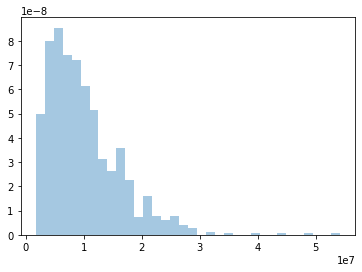

In [24]:
sns.distplot(df["Price"])

In [25]:
df['Ips'] = df['Screen'].apply(lambda x:1 if 'IPS' in x else 0)
df_test['Ips'] = df_test['Screen'].apply(lambda x:1 if 'IPS' in x else 0)

In [26]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1


In [27]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0


In [28]:
new = df['Screen'].str.split('x',n=1,expand=True)
new_test = df_test['Screen'].str.split('x',n=1,expand=True)

In [29]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1


In [30]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

df_test['X_res'] = new_test[0]
df_test['Y_res'] = new_test[1]

In [31]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,IPS Panel Retina Display 2560,1600


In [32]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,1366,768
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,Full HD 1920,1080
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,IPS Panel Full HD / Touchscreen 1920,1080
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,Full HD 1920,1080
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0,Full HD 1920,1080


In [33]:
# Cleaning the X component of the resolution
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df_test['X_res'] = df_test['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [34]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,2560,1600


In [35]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,1366,768
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,1920,1080
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,1920,1080
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,1920,1080
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0,1920,1080


In [36]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

df_test['X_res'] = df_test['X_res'].astype('int')
df_test['Y_res'] = df_test['Y_res'].astype('int')

In [37]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,2560,1600


In [38]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,1366,768
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,1920,1080
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,1920,1080
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,1920,1080
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0,1920,1080


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    float64
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    int32  
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  977 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
 13  Ips                       977 non-null    int64  
 14  X_res     

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              325 non-null    object 
 1   Model Name                325 non-null    object 
 2   Category                  325 non-null    object 
 3   Screen Size               325 non-null    float64
 4   Screen                    325 non-null    object 
 5   CPU                       325 non-null    object 
 6   RAM                       325 non-null    int32  
 7    Storage                  325 non-null    object 
 8   GPU                       325 non-null    object 
 9   Operating System          325 non-null    object 
 10  Operating System Version  325 non-null    object 
 11  Weight                    325 non-null    float64
 12  Price                     325 non-null    float64
 13  Ips                       325 non-null    int64  
 14  X_res     

In [41]:
df.corr(numeric_only=True)['Price']

Screen Size    0.075152
RAM            0.764005
Weight         0.224415
Price          1.000000
Ips            0.234718
X_res          0.579901
Y_res          0.577594
Name: Price, dtype: float64

In [42]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Screen Size']).astype('float')
df_test['ppi'] = (((df_test['X_res']**2) + (df_test['Y_res']**2))**0.5/df_test['Screen Size']).astype('float')
# finding dpi or ppi

In [43]:
df.corr(numeric_only=True)['Price']

Screen Size    0.075152
RAM            0.764005
Weight         0.224415
Price          1.000000
Ips            0.234718
X_res          0.579901
Y_res          0.577594
ppi            0.499022
Name: Price, dtype: float64

In [44]:
df.drop(columns=['Screen'],inplace=True)
df_test.drop(columns=['Screen'],inplace=True)

In [45]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res,ppi
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,1440,900,127.677940
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,1920,1080,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,2880,1800,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,2560,1600,226.983005


In [46]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res,ppi
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,1366,768,100.454670
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,1920,1080,127.335675
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,1920,1080,141.211998
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,1920,1080,165.632118
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0,1920,1080,141.211998


In [47]:
df.drop(columns=['Screen Size','X_res','Y_res'],inplace=True)
df_test.drop(columns=['Screen Size','X_res','Y_res'],inplace=True)

In [48]:
df.head()

,Manufacturer,Model Name,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,ppi
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,226.983005


In [49]:
df_test.head()

,Manufacturer,Model Name,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,ppi
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,100.454670
1,Asus,Rog GL753VE-DS74,Gaming,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,127.335675
2,Dell,Inspiron 7579,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,141.211998
3,Toshiba,Portege Z30-C-1CV,Notebook,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,165.632118
4,Lenovo,IdeaPad 320-15ABR,Notebook,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0,141.211998


In [50]:
# EDA on CPU
df["CPU"].value_counts()

CPU
Intel Core i5 7200U 2.5GHz     151
Intel Core i7 7700HQ 2.8GHz    123
Intel Core i7 7500U 2.7GHz     103
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
Intel Core i7 2.9GHz             1
AMD E-Series 7110 1.8GHz         1
Intel Core i5 2.9GHz             1
Intel Core M m3 1.2GHz           1
Intel Core i5 7200U 2.70GHz      1
Name: count, Length: 106, dtype: int64

In [51]:
df_test["CPU"].value_counts()

CPU
Intel Core i5 7200U 2.5GHz              39
Intel Core i5 6200U 2.3GHz              36
Intel Core i7 6500U 2.5GHz              33
Intel Core i7 6700HQ 2.6GHz             32
Intel Core i7 7500U 2.7GHz              30
Intel Core i7 7700HQ 2.8GHz             23
Intel Core i3 7100U 2.4GHz              11
Intel Celeron Dual Core N3050 1.6GHz    10
Intel Core i7 6600U 2.6GHz              10
Intel Core i5 6300U 2.4GHz               8
Intel Celeron Dual Core N3060 1.6GHz     8
Intel Core i3 6006U 2GHz                 7
Intel Core i3 6100U 2.3GHz               7
Intel Core i3 6006U 2.0GHz               6
Intel Core i7 6820HK 2.7GHz              4
Intel Pentium Quad Core N3710 1.6GHz     3
Intel Core M 6Y30 0.9GHz                 3
Intel Core i5 6300HQ 2.3GHz              3
Intel Atom x5-Z8550 1.44GHz              3
AMD A9-Series 9410 2.9GHz                3
Intel Core i5 7300HQ 2.5GHz              3
Intel Celeron Dual Core N3350 1.1GHz     3
Intel Celeron Dual Core 3205U 1.5GHz     2
AMD A12

In [52]:
df['CPU Name'] = df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))
df_test['CPU Name'] = df_test['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

In [53]:
df.head()

,Manufacturer,Model Name,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,ppi,CPU Name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,226.983005,Intel Core i5


In [54]:
df_test.head()

,Manufacturer,Model Name,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,ppi,CPU Name
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,100.454670,Intel Core i7
1,Asus,Rog GL753VE-DS74,Gaming,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,127.335675,Intel Core i7
2,Dell,Inspiron 7579,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,141.211998,Intel Core i7
3,Toshiba,Portege Z30-C-1CV,Notebook,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,165.632118,Intel Core i5
4,Lenovo,IdeaPad 320-15ABR,Notebook,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0,141.211998,AMD A12-Series 9720P


In [55]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [56]:
df['CPU Brand'] = df['CPU Name'].apply(fetch_processor)
df_test['CPU Brand'] = df_test['CPU Name'].apply(fetch_processor)

In [57]:
df.head()

,Manufacturer,Model Name,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,ppi,CPU Name,CPU Brand
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:xlabel='CPU Brand'>

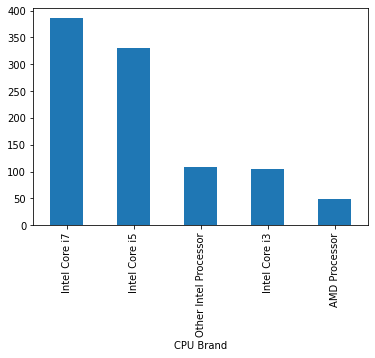

In [58]:
df['CPU Brand'].value_counts().plot(kind='bar')

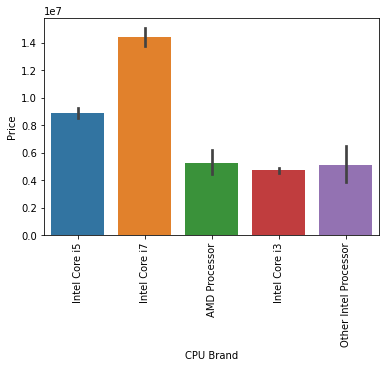

In [59]:
sns.barplot(x=df['CPU Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
df.drop(columns=['CPU','CPU Name'],inplace=True)

In [61]:
df_test.drop(columns=['CPU','CPU Name'],inplace=True)

In [62]:
df.head()

,Manufacturer,Model Name,Category,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,ppi,CPU Brand
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,226.983005,Intel Core i5


In [63]:
df_test.head()

,Manufacturer,Model Name,Category,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,ppi,CPU Brand
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,100.454670,Intel Core i7
1,Asus,Rog GL753VE-DS74,Gaming,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,127.335675,Intel Core i7
2,Dell,Inspiron 7579,2 in 1 Convertible,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,141.211998,Intel Core i7
3,Toshiba,Portege Z30-C-1CV,Notebook,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,165.632118,Intel Core i5
4,Lenovo,IdeaPad 320-15ABR,Notebook,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0,141.211998,AMD Processor


<AxesSubplot:xlabel='RAM'>

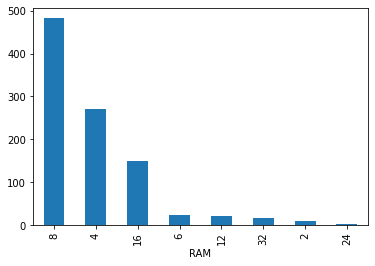

In [64]:
df['RAM'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='RAM'>

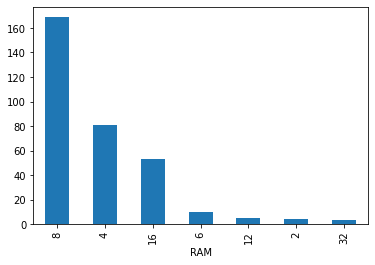

In [65]:
df_test['RAM'].value_counts().plot(kind='bar')

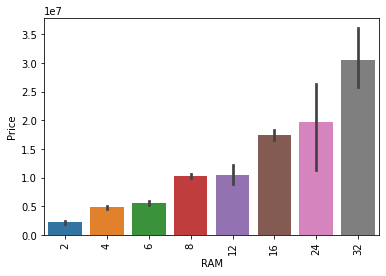

In [66]:
sns.barplot(x=df['RAM'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
df[" Storage"].value_counts()

 Storage
256GB SSD                        318
1TB HDD                          171
512GB SSD                         91
500GB HDD                         79
128GB SSD +  1TB HDD              71
128GB SSD                         62
256GB SSD +  1TB HDD              52
32GB Flash Storage                29
2TB HDD                           14
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
64GB Flash Storage                 9
16GB Flash Storage                 6
256GB Flash Storage                5
32GB SSD                           5
128GB Flash Storage                4
1GB SSD                            4
256GB SSD +  256GB SSD             2
16GB SSD                           2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD             1
64GB SSD                           1
64GB Flash Storage +  1TB HDD

In [68]:
df[' Storage'] = df[' Storage'].astype(str).replace('\.0', '', regex=True)
df[" Storage"] = df[" Storage"].str.replace('GB', '')
df[" Storage"] = df[" Storage"].str.replace('TB', '000')
new = df[" Storage"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', "",regex=True)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '',regex=True)
# df["first"] = df["first"].str.replace(r"[^0-9]+", "")
# df["second"] = df["second"].str.replace(r"[^0-9]+", "")


In [69]:
df.sample(10)

,Manufacturer,Model Name,Category,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
414,Asus,ZenBook Flip,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows,10,1.27,8251776.00,...,256,0,0,1,0,0,0,0,0,0
98,Asus,X541UV-DM1439T (i3-7100U/6GB/256GB/GeForce,Notebook,6,256 SSD,Nvidia GeForce 920M,Windows,10,2.00,5130684.00,...,256,0,0,1,0,0,0,0,0,0
214,Huawei,MateBook X,Ultrabook,8,512 SSD,Intel HD Graphics 620,Windows,10,1.05,13329108.00,...,512,0,0,1,0,0,0,0,0,0
66,HP,250 G6,Notebook,4,500 HDD,AMD Radeon 520,Windows,10,1.86,3900831.48,...,500,0,1,0,0,0,0,0,0,0
41,Dell,Inspiron 7577,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows,10,2.65,13329108.00,...,256,1000,0,1,0,0,1,0,0,0
358,Dell,Inspiron 3567,Notebook,8,2000 HDD,Intel HD Graphics 620,Windows,10,2.36,4956134.04,...,2000,0,1,0,0,0,0,0,0,0
920,Dell,Vostro 3568,Notebook,4,1000 HDD,AMD Radeon R5 M420,Windows,10,2.18,6090931.08,...,1000,0,1,0,0,0,0,0,0,0
951,Dell,Latitude 7480,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows,10,1.36,15783300.00,...,256,0,0,1,0,0,0,0,0,0
558,HP,15-bw007nv (A10-9620P/6GB/128GB/Radeon,Notebook,6,128 SSD,AMD Radeon 530,Windows,10,1.91,5058658.80,...,128,0,0,1,0,0,0,0,0,0
240,Lenovo,IdeaPad 320-15ISK,Notebook,8,128 SSD,Intel HD Graphics 520,Windows,10,2.20,5237388.00,...,128,0,0,1,0,0,0,0,0,0


In [70]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [71]:
df.drop(columns=[" Storage"])

,Manufacturer,Model Name,Category,RAM,GPU,Operating System,Operating System Version,Weight,Price,Ips,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,32,Nvidia GeForce GTX 1070,Windows,10,4.42,24897600.00,0,127.335675,Intel Core i7,1000,256,0,0
973,Toshiba,Tecra A40-C-1DF,Notebook,8,Intel HD Graphics 520,Windows,10,1.95,10492560.00,0,157.350512,Intel Core i5,0,256,0,0
974,Asus,Rog Strix,Gaming,16,Nvidia GeForce GTX 1060,Windows,10,2.73,18227710.80,0,127.335675,Intel Core i7,1000,256,0,0
975,HP,Probook 450,Notebook,8,Nvidia GeForce 930MX,Windows,10,2.04,8705268.00,1,141.211998,Intel Core i5,1000,128,0,0


In [72]:
df_test[' Storage'] = df_test[' Storage'].astype(str).replace('\.0', '', regex=True)
df_test[" Storage"] = df_test[" Storage"].str.replace('GB', '')
df_test[" Storage"] = df_test[" Storage"].str.replace('TB', '000')
new = df_test[" Storage"].str.split("+", n = 1, expand = True)

df_test["first"]= new[0]
df_test["first"]=df_test["first"].str.strip()

df_test["second"]= new[1]

df_test["Layer1HDD"] = df_test["first"].apply(lambda x: 1 if "HDD" in x else 0)
df_test["Layer1SSD"] = df_test["first"].apply(lambda x: 1 if "SSD" in x else 0)
df_test["Layer1Hybrid"] = df_test["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df_test["Layer1Flash_Storage"] = df_test["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df_test['first'] = df_test['first'].str.replace(r'\D', "",regex=True)

df_test["second"].fillna("0", inplace = True)

df_test["Layer2HDD"] = df_test["second"].apply(lambda x: 1 if "HDD" in x else 0)
df_test["Layer2SSD"] = df_test["second"].apply(lambda x: 1 if "SSD" in x else 0)
df_test["Layer2Hybrid"] = df_test["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df_test["Layer2Flash_Storage"] = df_test["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df_test['second'] = df_test['second'].str.replace(r'\D', '',regex=True)
# df["first"] = df["first"].str.replace(r"[^0-9]+", "")
# df["second"] = df["second"].str.replace(r"[^0-9]+", "")
df_test["first"] = df_test["first"].astype(int)
df_test["second"] = df_test["second"].astype(int)

df_test["HDD"]=(df_test["first"]*df_test["Layer1HDD"]+df_test["second"]*df_test["Layer2HDD"])
df_test["SSD"]=(df_test["first"]*df_test["Layer1SSD"]+df_test["second"]*df_test["Layer2SSD"])
df_test["Hybrid"]=(df_test["first"]*df_test["Layer1Hybrid"]+df_test["second"]*df_test["Layer2Hybrid"])
df_test["Flash_Storage"]=(df_test["first"]*df_test["Layer1Flash_Storage"]+df_test["second"]*df_test["Layer2Flash_Storage"])

df_test.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

df_test.drop(columns=[" Storage"])

,Manufacturer,Model Name,Category,RAM,GPU,Operating System,Operating System Version,Weight,Price,Ips,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,8,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,100.454670,Intel Core i7,1000,0,0,0
1,Asus,Rog GL753VE-DS74,Gaming,8,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,127.335675,Intel Core i7,1000,256,0,0
2,Dell,Inspiron 7579,2 in 1 Convertible,8,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,141.211998,Intel Core i7,0,512,0,0
3,Toshiba,Portege Z30-C-1CV,Notebook,16,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,165.632118,Intel Core i5,0,128,0,0
4,Lenovo,IdeaPad 320-15ABR,Notebook,8,AMD Radeon 530,Windows,10,2.20,4881708.0,0,141.211998,AMD Processor,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,8,Intel HD Graphics 520,Windows,10,1.80,5673096.0,1,157.350512,Intel Core i7,0,128,0,0
321,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,4,Intel HD Graphics 520,Windows,10,1.30,13329108.0,1,276.053530,Intel Core i7,0,512,0,0
322,Lenovo,IdeaPad 100S-14IBR,Notebook,8,Intel HD Graphics,Windows,10,1.50,2036268.0,0,111.935204,Other Intel Processor,0,0,0,64
323,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,8,AMD Radeon R5 M330,Windows,10,2.19,6793488.0,0,100.454670,Intel Core i7,1000,0,0,0


In [73]:
df.corr(numeric_only=True)['Price']
#to find correlaion between every attribte with price

RAM              0.764005
Weight           0.224415
Price            1.000000
Ips              0.234718
ppi              0.499022
HDD             -0.088832
SSD              0.670753
Hybrid          -0.011725
Flash_Storage   -0.037147
Name: Price, dtype: float64

In [74]:
df.drop(columns=["Hybrid","Flash_Storage"],inplace=True)

In [75]:
df_test.drop(columns=["Hybrid","Flash_Storage"],inplace=True)

In [76]:
df.sample(10)

,Manufacturer,Model Name,Category,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,ppi,CPU Brand,HDD,SSD
129,HP,ProBook 470,Notebook,8,256 SSD,Intel UHD Graphics 620,Windows,10,2.500,8251776.00,0,127.335675,Intel Core i5,0,256
109,Lenovo,Thinkpad T470,Notebook,8,256 SSD,Intel HD Graphics 620,Windows,10,1.580,13160160.00,1,157.350512,Intel Core i7,0,256
827,Dell,Latitude 3480,Notebook,4,500 HDD,Intel HD Graphics 520,Windows,10,1.760,5201820.00,0,111.935204,Intel Core i3,500,0
538,HP,Omen 15-ce006nv,Gaming,12,1000 HDD,Nvidia GeForce GTX 1060,Windows,10,2.620,15996708.00,0,127.335675,Intel Core i7,1000,0
881,HP,Pavilion x360,2 in 1 Convertible,4,500 HDD,Intel HD Graphics 620,Windows,10,2.300,6089241.60,0,100.454670,Intel Core i5,500,0
460,Acer,Aspire E5-576G,Notebook,4,1000 HDD,Nvidia GeForce 940MX,Windows,10,2.230,4837248.00,0,141.211998,Intel Core i3,1000,0
815,Lenovo,Thinkpad T470s,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows,10,1.320,16530228.00,0,157.350512,Intel Core i7,0,256
670,Microsoft,Surface Laptop,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 640,Windows,10 S,1.252,16608922.20,0,200.842560,Intel Core i7,0,256
758,Dell,Alienware 17,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows,10,4.420,25511059.08,1,282.423996,Intel Core i7,1000,256
913,HP,ProBook 450,Notebook,8,256 SSD,Nvidia GeForce 930MX,Windows,10,2.040,9060859.08,0,141.211998,Intel Core i7,0,256


In [77]:
df.drop(columns=[" Storage"],inplace=True)
df_test.drop(columns=[" Storage"], inplace=True)


In [78]:
df['GPU'].value_counts()

GPU
Intel HD Graphics 620             225
Intel HD Graphics 520              98
Intel UHD Graphics 620             66
Nvidia GeForce GTX 1050            57
AMD Radeon 530                     37
                                 ... 
Nvidia GeForce GTX 960<U+039C>      1
Intel Graphics 620                  1
Nvidia GeForce GTX 960              1
AMD Radeon R5 520                   1
AMD Radeon R9 M385                  1
Name: count, Length: 98, dtype: int64

In [79]:
df['GPU Brand'] = df['GPU'].apply(lambda x:x.split()[0])

In [80]:
df.head()

,Manufacturer,Model Name,Category,RAM,GPU,Operating System,Operating System Version,Weight,Price,Ips,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,226.983005,Intel Core i5,0,256,Intel


In [81]:
df_test['GPU Brand'] = df_test['GPU'].apply(lambda x:x.split()[0])

In [82]:
df["GPU Brand"].value_counts()

GPU Brand
Intel     525
Nvidia    310
AMD       142
Name: count, dtype: int64

In [83]:
df_test["GPU Brand"].value_counts()

GPU Brand
Intel     197
Nvidia     89
AMD        38
ARM         1
Name: count, dtype: int64

In [84]:
df = df[df['GPU Brand'] != 'ARM']
df_test = df_test[df_test['GPU Brand'] != 'ARM']

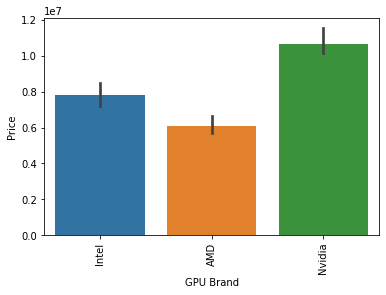

In [85]:
sns.barplot(x=df['GPU Brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [86]:
df.drop(columns=['GPU'],inplace=True)
df_test.drop(columns=['GPU'],inplace=True)

In [87]:
df.head()

,Manufacturer,Model Name,Category,RAM,Operating System,Operating System Version,Weight,Price,Ips,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,MacBook Pro,Ultrabook,8,macOS,10,1.37,11912523.48,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,10,1.34,7993374.48,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,No OS,10,1.86,5112900.00,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,10,1.83,22563005.40,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,10,1.37,16037611.20,1,226.983005,Intel Core i5,0,256,Intel


In [88]:
df["Operating System"].value_counts()

Operating System
Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: count, dtype: int64

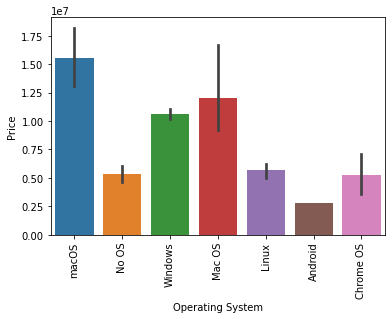

In [89]:
sns.barplot(x= df["Operating System"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [90]:
df.drop(columns=["Operating System Version","Model Name"], inplace=True)
df_test.drop(columns=["Operating System Version","Model Name"], inplace=True)


<AxesSubplot:>

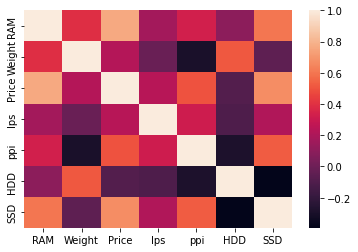

In [91]:
sns.heatmap(df.corr(numeric_only=True))

In [92]:
df.head()

,Manufacturer,Category,RAM,Operating System,Weight,Price,Ips,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,11912523.48,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,7993374.48,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,5112900.00,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,22563005.40,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,16037611.20,1,226.983005,Intel Core i5,0,256,Intel


In [93]:
df_test.head()

,Manufacturer,Category,RAM,Operating System,Weight,Price,Ips,ppi,CPU Brand,HDD,SSD,GPU Brand
0,HP,Notebook,8,Windows,2.04,5148468.0,0,100.454670,Intel Core i7,1000,0,Intel
1,Asus,Gaming,8,Windows,2.99,15552108.0,0,127.335675,Intel Core i7,1000,256,Nvidia
2,Dell,2 in 1 Convertible,8,Windows,2.19,11550708.0,1,141.211998,Intel Core i7,0,512,Intel
3,Toshiba,Notebook,16,Windows,1.20,10625940.0,0,165.632118,Intel Core i5,0,128,Intel
4,Lenovo,Notebook,8,Windows,2.20,4881708.0,0,141.211998,AMD Processor,0,256,AMD


In [94]:
data= pd.concat([df, df_test], ignore_index= True, join= 'inner') # the parameter ignore index reset the index of the generated dataframe.
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [95]:
X

,Manufacturer,Category,RAM,Operating System,Weight,Ips,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...
1296,Lenovo,2 in 1 Convertible,8,Windows,1.80,1,157.350512,Intel Core i7,0,128,Intel
1297,Lenovo,2 in 1 Convertible,4,Windows,1.30,1,276.053530,Intel Core i7,0,512,Intel
1298,Lenovo,Notebook,8,Windows,1.50,0,111.935204,Other Intel Processor,0,0,Intel
1299,HP,Notebook,8,Windows,2.19,0,100.454670,Intel Core i7,1000,0,AMD


In [279]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [280]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [281]:
X_train

,Manufacturer,Category,RAM,Operating System,Weight,Ips,ppi,CPU Brand,HDD,SSD,GPU Brand
550,Lenovo,Notebook,4,Windows,2.20,0,141.211998,Intel Core i3,0,128,Intel
980,Toshiba,Notebook,16,Windows,1.20,0,165.632118,Intel Core i5,0,128,Intel
860,Lenovo,Notebook,8,Windows,2.30,1,141.211998,Intel Core i5,1000,0,Intel
90,Asus,Gaming,8,Windows,2.45,0,141.211998,AMD Processor,1000,0,AMD
418,Dell,Notebook,8,Windows,2.14,0,100.454670,Intel Core i5,1000,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Windows,2.20,0,100.454670,Intel Core i3,500,0,Nvidia
299,Asus,Ultrabook,16,Windows,1.63,0,141.211998,Intel Core i7,0,512,Nvidia
493,Acer,Notebook,8,Windows,2.20,0,100.454670,AMD Processor,1000,0,AMD
527,Lenovo,Notebook,8,No OS,2.20,0,100.454670,Intel Core i3,2000,0,Nvidia


## Using Random Forest

In [297]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,7,10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=125, random_state=3,max_samples=0.64,
                              max_features=0.74,
                              max_depth=75, criterion="friedman_mse")

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2), 
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8682001965951774
MAE 0.1625021390776729


In [272]:
# data["Manufacturer"].value_counts()

Manufacturer
Dell         297
Lenovo       297
HP           274
Asus         157
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64